# Zastosowanie drzew decyzyjnych oraz lasów losowych przy, gdzie y reprezentowany jest przez dane typu ciągłego**


## 1. Biblioteki

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.tree import DecisionTreeRegressor  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego
from sklearn.metrics import mean_absolute_error, r2_score #funkcje do badania dopasowania modelu
from sklearn.ensemble import RandomForestRegressor #ladowanie funkcji RandomForestRegressor do tworzenia instancji algorytmu
from sklearn.ensemble import GradientBoostingRegressor 
import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

import graphviz

## 2. Wczytuje  i sprawdzam typ danych

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

In [3]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

### 3. Usuwam mniejszości zmiennych kategorycznych 

In [4]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [5]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [6]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [7]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [8]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [9]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [10]:
caly_label=caly_df["OMC"]
del caly_df["OMC"]

### 4. Zakodowuje zmienne kategoryczne 

In [11]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

In [12]:
caly_df

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,2015,2016,2017,2018,2019,2020,2021
0,137,127,121,113,106,128,109,107,110,101,...,0,0,0,0,0,0,0,0,1,0
1,126,123,109,113,103,128,114,114,113,94,...,0,0,0,0,0,0,1,0,0,0
2,126,120,110,107,102,124,113,112,117,94,...,0,0,0,0,0,0,0,0,1,0
3,133,111,104,110,99,114,114,113,126,89,...,0,0,0,0,0,0,0,0,1,0
4,125,115,91,95,101,124,134,129,133,102,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,134,119,112,115,106,118,102,103,108,92,...,0,0,0,0,0,0,0,0,1,0
185,132,117,103,103,107,119,93,94,102,96,...,0,0,0,0,0,0,1,0,0,0
186,120,109,106,97,96,115,120,114,134,100,...,0,0,0,0,0,0,0,1,0,0
187,113,114,97,94,103,120,114,104,115,132,...,1,0,0,0,0,0,1,0,0,0


In [13]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 188
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PI-PROD              1875 non-null   int64  
 1   PI-POKR              1875 non-null   int64  
 2   Prc                  1875 non-null   int64  
 3   Psm                  1875 non-null   int64  
 4   Pnr                  1875 non-null   int64  
 5   Pw                   1875 non-null   int64  
 6   PI-PLOD              1875 non-null   int64  
 7   CRj                  1875 non-null   int64  
 8   CRk                  1875 non-null   int64  
 9   PP                   1875 non-null   int64  
 10  WH-KSOM              1875 non-null   int64  
 11  WH-DLUG              1875 non-null   int64  
 12  IP                   1875 non-null   int64  
 13  kg ml                1875 non-null   int64  
 14  kg tł                1875 non-null   int64  
 15  % tł                 1875 non-null   in

### 5. Tworzę metrykę do oceny dobierania parametrów


In [14]:
mae_scorer = make_scorer(mean_absolute_error)

## 6 Modele

In [15]:
# Drzewa, lasy, gradient boosting i XGBR nie wymagają standaryzacji

### 6.1 Drzewa decyzyjne

#### 6.1.1 Dobieranie zmiennych

In [16]:
estimator=DecisionTreeRegressor()
selector = RFECV(estimator, step=1, cv=5,scoring=mae_scorer)
selector2 = selector.fit(caly_df, caly_label)


In [17]:
selector2.ranking_

array([22, 25,  7, 13, 16, 15,  3, 19,  2,  1, 14, 17,  4,  5,  8, 20,  9,
       12, 18, 11, 10,  6, 21, 44, 27, 42, 33, 26, 35, 30, 37, 28, 40, 43,
       23, 32, 34, 41, 39, 45, 36, 38, 31, 24, 29, 46])

In [18]:
nazwy_kolumn=caly_df.columns
dictionary = dict(zip(nazwy_kolumn, selector2.ranking_))
dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1]))

In [19]:
dictionary

{'PP': 1,
 'CRk': 2,
 'PI-PLOD': 3,
 'IP': 4,
 'kg ml': 5,
 'w': 6,
 'Prc': 7,
 'kg tł': 8,
 'kg bi': 9,
 'nr': 10,
 'sm': 11,
 '% bi': 12,
 'Psm': 13,
 'WH-KSOM': 14,
 'Pw': 15,
 'Pnr': 16,
 'WH-DLUG': 17,
 'rc': 18,
 'CRj': 19,
 '% tł': 20,
 'og': 21,
 'PI-PROD': 22,
 'WIELKOPOLSKIE': 23,
 2019: 24,
 'PI-POKR': 25,
 'MAZOWIECKIE': 26,
 'KUJAWSKO-POMORSKIE': 27,
 'PODLASKIE': 28,
 2020: 29,
 'OPOLSKIE': 30,
 2018: 31,
 'ZACHODNIOPOMORSKIE': 32,
 'LUBUSKIE': 33,
 'ŁÓDZKIE': 34,
 'MAŁOPOLSKIE': 35,
 2016: 36,
 'PODKARPACKIE': 37,
 2017: 38,
 'ŚWIĘTOKRZYSKIE': 39,
 'POMORSKIE': 40,
 'ŚLĄSKIE': 41,
 'LUBELSKIE': 42,
 'WARMIŃSKO-MAZURSKIE': 43,
 'DOLNOŚLĄSKIE': 44,
 2015: 45,
 2021: 46}

In [20]:
nazwy_kolumn_2=[]
for x in dictionary.keys():
    nazwy_kolumn_2.append(x)

In [21]:
caly_df_zapas=caly_df

In [22]:
nazwy_kolumn_2

['PP',
 'CRk',
 'PI-PLOD',
 'IP',
 'kg ml',
 'w',
 'Prc',
 'kg tł',
 'kg bi',
 'nr',
 'sm',
 '% bi',
 'Psm',
 'WH-KSOM',
 'Pw',
 'Pnr',
 'WH-DLUG',
 'rc',
 'CRj',
 '% tł',
 'og',
 'PI-PROD',
 'WIELKOPOLSKIE',
 2019,
 'PI-POKR',
 'MAZOWIECKIE',
 'KUJAWSKO-POMORSKIE',
 'PODLASKIE',
 2020,
 'OPOLSKIE',
 2018,
 'ZACHODNIOPOMORSKIE',
 'LUBUSKIE',
 'ŁÓDZKIE',
 'MAŁOPOLSKIE',
 2016,
 'PODKARPACKIE',
 2017,
 'ŚWIĘTOKRZYSKIE',
 'POMORSKIE',
 'ŚLĄSKIE',
 'LUBELSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'DOLNOŚLĄSKIE',
 2015,
 2021]

In [23]:
dane_do_porownania=pd.DataFrame(columns=["Liczba zmiennych",
                                    "Błąd"]
                                )
glowne_wyniki=[]
glowne_zmienne=[]
zm=[]
for i in range(0,len(nazwy_kolumn_2)):
    zmienne=[]
    for q in range(0,i+1):
        zmienne.append(nazwy_kolumn_2[q])
    zm.append(zmienne)
    data_frame=caly_df_zapas[zmienne]
    kfold = KFold(n_splits=5, shuffle=False)

    data_frame = np.array(data_frame)
    caly_label = np.array(caly_label)
    
    wyniki=[]
    
    for train, test in kfold.split(data_frame, caly_label):
        reg = DecisionTreeRegressor()
        reg.fit(data_frame[train], caly_label[train])
        predykcje=reg.predict(data_frame[test])
        
        dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                    "obs": caly_label[test]
                                })
        
        dane_folda['blad']=abs(dane_folda['obs']-dane_folda['pred'])
        mae=dane_folda['blad'].sum()/len(dane_folda['blad'])
        wyniki.append(mae)
        
    wynik=sum(wyniki)/len(wyniki)
    glowne_wyniki.append(wynik)
    glowne_zmienne.append(i)

                       

In [24]:
dane_do_porownania["Liczba zmiennych"]=glowne_zmienne
dane_do_porownania["Błąd"]=glowne_wyniki

In [25]:
list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))

5

In [26]:
zmienne_5=zm[list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))]

In [27]:
print(zmienne_5)

['PP', 'CRk', 'PI-PLOD', 'IP', 'kg ml', 'w']


In [28]:
dane_do_porownania.to_csv('Wyniki REFCV Drzewo losowe OMC.csv',index=False)

In [16]:
zmienne_5=['PP', 'CRk', 'PI-PLOD', 'IP', 'kg ml', 'Pw']

In [75]:
len(dane_do_porownania["Błąd"])

46

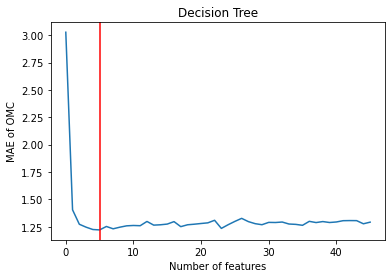

In [77]:
plt.plot(list(dane_do_porownania["Błąd"]))
plt.axvline(x=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"]))), color='r', linestyle='-')
plt.xlabel("Number of features")
plt.ylabel("MAE of OMC")
plt.title("Decision Tree")
plt.show()

In [19]:
zestaw_caly=caly_df_zapas
zestaw_5=caly_df_zapas[zmienne_5]


In [20]:
zestaw_caly = np.array(zestaw_caly)
zestaw_5 = np.array(zestaw_5)

caly_label = np.array(caly_label)

### 6.2 Hiperparametry drzewa losowego

In [31]:
param_grid = {
    'criterion':['mae'],
    'splitter':['best', 'random'],
    'min_samples_split':range(2,10,2),
    'min_samples_leaf': range(1,10,2),    
    'max_leaf_nodes':range(2,10,2),
    'max_depth':list(range(2, 10,1))
}

### 6.2.1 Wszystkie dane

#### 6.2.1.1 Wszystkie dane part 1

In [32]:
dt_1 = DecisionTreeRegressor()
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 1280 candidates, totalling 2560 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': range(2, 10, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [33]:
grid_search_1.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [34]:
grid_search_1.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=4, max_leaf_nodes=8)

In [35]:
grid_search_1.best_score_

-2.667130500872676

#### 6.2.1.2 Wszystkie dane part 2

In [40]:
param_grid = {
    'criterion':['mae'],
    'splitter':['best'],
    'min_samples_split':range(2,5,1),
    'min_samples_leaf': range(1,5,1),    
    'max_leaf_nodes':range(6,16,1),
    'max_depth':list(range(2, 7,1))
}

In [41]:
dt_1 = DecisionTreeRegressor()
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 600 candidates, totalling 1200 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['mae'], 'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': range(6, 16),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best']},
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
grid_search_1.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [43]:
grid_search_1.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)

In [44]:
grid_search_1.best_score_

-2.187737368956407

#### 6.2.1.2 Zestaw 5 part 1 

In [36]:
dt_2 = DecisionTreeRegressor()
grid_search_2 = GridSearchCV(estimator = dt_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_5, np.ravel(caly_label))

Fitting 2 folds for each of 1280 candidates, totalling 2560 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': range(2, 10, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [37]:
grid_search_2.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [38]:
grid_search_2.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=4, max_leaf_nodes=8)

In [39]:
grid_search_2.best_score_

-2.667130500872676

#### 6.2.1.3 Zestaw 5 part 2 

In [45]:
param_grid = {
    'criterion':['mae'],
    'splitter':['best'],
    'min_samples_split':range(2,5,1),
    'min_samples_leaf': range(1,5,1),    
    'max_leaf_nodes':range(6,16,1),
    'max_depth':list(range(2, 7,1))
}

In [46]:
dt_2 = DecisionTreeRegressor()
grid_search_2 = GridSearchCV(estimator = dt_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_5, np.ravel(caly_label))

Fitting 2 folds for each of 600 candidates, totalling 1200 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['mae'], 'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': range(6, 16),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best']},
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
grid_search_2.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [48]:
grid_search_2.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)

In [49]:
grid_search_2.best_score_

-2.187737368956407

### 6.3 Cros validacja dla drzewa decyzyjnego

#### 6.3.1 Cros validacja dla drzewa decyzyjnego Zestaw 5

In [50]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_5, caly_label):
    dt_1 =DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)
    
    dt_1.fit(zestaw_5[train], caly_label[train])
    predykcje=dt_1.predict(zestaw_5[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [51]:
wart_1

[2.3013333333333335, 2.168, 2.088, 2.1026666666666665, 2.1666666666666665]

In [52]:
sum(wart_1)/len(wart_1)

2.1653333333333333

#### 6.3.2 Cros validacja dla drzewa decyzyjnego Wszystkie dane

In [53]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    dt_2 =DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)
    
    dt_2.fit(zestaw_caly[train], caly_label[train])
    predykcje=dt_2.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje) #y tre, y pred
    wart_2.append(sredni_blad)
    licznik+=1

In [54]:
wart_2

[2.3013333333333335, 2.168, 2.088, 2.1026666666666665, 2.1666666666666665]

In [55]:
sum(wart_2)/len(wart_2)

2.1653333333333333

In [56]:
dt_2

DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)

In [133]:
zm[list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))]

['PP', 'CRk', 'PI-PLOD', 'IP', 'kg ml', 'Pw']

### 6.4 Tworzę graf dla drzewa decyzyjnego wszystkie dane

In [58]:
dt_2=DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)

In [59]:
dt_2.fit(zestaw_caly, np.ravel(caly_label))

DecisionTreeRegressor(criterion='mae', max_depth=6, max_leaf_nodes=15)

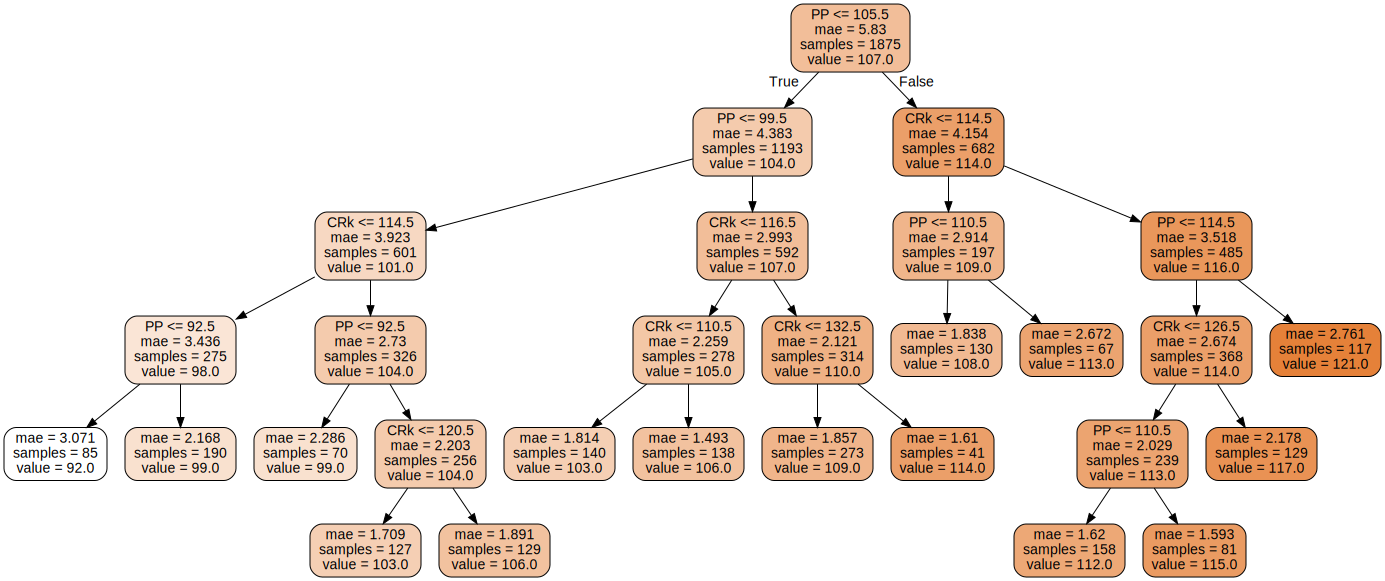

In [60]:
dot_data = tree.export_graphviz(dt_2,  
                                feature_names = list(caly_df_zapas)
, 
               class_names="OMC",
               rounded=True, 
               filled = True,out_file=None)
graph = graphviz.Source(dot_data, format="png") 
graph

In [61]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### 6.5 Zapisuje wyniki predykcji dla drzewa decyzyjnego wszystkie dane

In [62]:
dane_do_zapisu_2.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/Okres Między Ciążowy/OMC_Drzewo_Decyzyjne_FS.csv")

## 7.1 Losowe lasy drzew decyzyjnych 

### 7.1.1 Dobieranie zmiennych

In [29]:
estimator=RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=2,scoring=mae_scorer)
selector2 = selector.fit(caly_df, caly_label)                   

In [30]:
kombinacje=[]
nazwy_kolumn=caly_df.columns
dictionary = dict(zip(nazwy_kolumn, selector2.ranking_))
dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1]))

In [31]:
nazwy_kolumn_2=[]
for x in dictionary.keys():
    nazwy_kolumn_2.append(x)

In [32]:

dane_do_porownania=pd.DataFrame(columns=["Liczba zmiennych",
                                    "Błąd"]
                                )
glowne_wyniki=[]
glowne_zmienne=[]
for i in range(0,len(nazwy_kolumn_2)):
    zmienne=[]
    for q in range(0,i+1):
        zmienne.append(nazwy_kolumn_2[q])
    kombinacje.append(zmienne)
    data_frame=caly_df_zapas[zmienne]
    kfold = KFold(n_splits=5, shuffle=False)

    data_frame = np.array(data_frame)
    caly_label = np.array(caly_label)
    
    wyniki=[]
    
    for train, test in kfold.split(data_frame, caly_label):
        reg = RandomForestRegressor()
        reg.fit(data_frame[train], caly_label[train])
        predykcje=reg.predict(data_frame[test])
        
        dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                    "obs": caly_label[test]
                                })
        
        dane_folda['blad']=abs(dane_folda['obs']-dane_folda['pred'])
        mae=dane_folda['blad'].sum()/len(dane_folda['blad'])
        wyniki.append(mae)
        
    wynik=sum(wyniki)/len(wyniki)
    glowne_wyniki.append(wynik)
    glowne_zmienne.append(i)
    
dane_do_porownania["Liczba zmiennych"]=glowne_zmienne
dane_do_porownania["Błąd"]=glowne_wyniki

index=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))

print(kombinacje[index])

['PP', 'CRk', 'PI-PLOD', 'kg ml', 'kg tł', 'w', 'kg bi', 'Psm', '% bi', 'nr', 'IP', 'Prc', 'og', '% tł', 'WH-KSOM', 'Pw', 'WH-DLUG', 'Pnr', 'sm', 'CRj', 'rc', 'PI-POKR', 'PI-PROD', 'WIELKOPOLSKIE', 2019, 'KUJAWSKO-POMORSKIE', 2020, 2018, 'OPOLSKIE', 'MAZOWIECKIE', 'PODLASKIE', 'ZACHODNIOPOMORSKIE', 'ŁÓDZKIE']


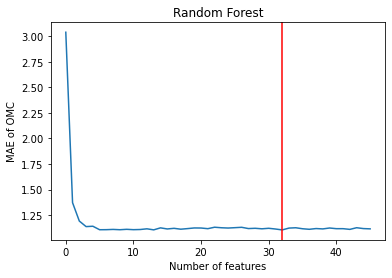

In [33]:
plt.plot(list(dane_do_porownania["Błąd"]))
plt.axvline(x=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"]))), color='r', linestyle='-')
plt.xlabel("Number of features")
plt.ylabel("MAE of OMC")
plt.title("Random Forest")
plt.show()

In [34]:
print(index,"\n",kombinacje[index])

32 
 ['PP', 'CRk', 'PI-PLOD', 'kg ml', 'kg tł', 'w', 'kg bi', 'Psm', '% bi', 'nr', 'IP', 'Prc', 'og', '% tł', 'WH-KSOM', 'Pw', 'WH-DLUG', 'Pnr', 'sm', 'CRj', 'rc', 'PI-POKR', 'PI-PROD', 'WIELKOPOLSKIE', 2019, 'KUJAWSKO-POMORSKIE', 2020, 2018, 'OPOLSKIE', 'MAZOWIECKIE', 'PODLASKIE', 'ZACHODNIOPOMORSKIE', 'ŁÓDZKIE']


In [35]:
kombinacje[6]

['PP', 'CRk', 'PI-PLOD', 'kg ml', 'kg tł', 'w', 'kg bi']

In [36]:
dane_do_porownania.to_csv('Wyniki REFCV las losowy OMC.csv',index=False)

In [154]:
zestaw_caly=caly_df_zapas
zestaw_6=caly_df_zapas[['PP', 'CRk', 'PI-PLOD', 'kg ml', 'kg tł', 'w', 'kg bi']]
zestaw_caly = np.array(zestaw_caly)
zestaw_6 = np.array(zestaw_6)

caly_label = np.array(caly_label)

## 7.2 Losowe lasy drzew decyzyjnych hiperparametry

## 7.2 Hiperparametry Zestaw 6

### 7.2.1 Hiperparametry Zestaw 6 part1

In [155]:
param_grid = {
    'criterion':['mae'],#
    'min_samples_split':range(2,10,3), #
    'min_samples_leaf': range(2,10,3),     #
    'max_leaf_nodes':range(5,15,5), #
    'max_depth':list(range(5, 15,5)), #
    'bootstrap': [True,False],
    'n_estimators':[100] #
}

In [156]:
rf_1 = RandomForestRegressor()
grid_search_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_6, np.ravel(caly_label))

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mae'],
                         'max_depth': [5, 10],
                         'max_leaf_nodes': range(5, 15, 5),
                         'min_samples_leaf': range(2, 10, 3),
                         'min_samples_split': range(2, 10, 3),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [157]:
grid_search_1.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=5, max_leaf_nodes=10,
                      min_samples_leaf=5)

In [158]:
grid_search_1.best_score_

-1.8694914842997998

### 7.2.2 Hiperparametry Zestaw 8 part2

In [173]:
param_grid2 = {
    'criterion':['mae'],#
    'min_samples_split':range(3,7,1), #5
    'min_samples_leaf': range(3,7,1), #5
    'max_leaf_nodes':range(8,12,1), #10
    'max_depth':list(range(3, 7,1)), #5
    'n_estimators':[100] #
}

In [174]:
rf_1 = RandomForestRegressor()
grid_search_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid2, 
                          cv = 2, n_jobs = 1, verbose = 2,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_6, np.ravel(caly_label))

Fitting 2 folds for each of 256 candidates, totalling 512 fits
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] E

[CV] END criterion=mae, max_depth=3, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=10, min_samp

[CV] END criterion=mae, max_depth=3, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=8, min_sample

[CV] END criterion=mae, max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=10, min_samples_

[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_sa

[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=9, min_samples_le

[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.1s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.1s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=11, min_sa

[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=9, min_samples_le

[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_sa

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'criterion': ['mae'], 'max_depth': [3, 4, 5, 6],
                         'max_leaf_nodes': range(8, 12),
                         'min_samples_leaf': range(3, 7),
                         'min_samples_split': range(3, 7),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [175]:
grid_search_1.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=4, max_leaf_nodes=11,
                      min_samples_leaf=6, min_samples_split=4)

In [176]:
grid_search_1.best_score_

-1.8182302828743915

## 7.3 Hiperparametry Wszystkie

### 7.3.1 Hiperparametry Wszystkie part1

In [159]:
rf_2 = RandomForestRegressor()
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 72 candidates, totalling 144 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mae'],
                         'max_depth': [5, 10],
                         'max_leaf_nodes': range(5, 15, 5),
                         'min_samples_leaf': range(2, 10, 3),
                         'min_samples_split': range(2, 10, 3),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [160]:
grid_search_2.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=5, max_leaf_nodes=10,
                      min_samples_leaf=5, min_samples_split=5)

In [161]:
grid_search_2.best_score_

-1.8534531024933267

### 7.3.2 Hiperparametry Wszystkie part2

In [177]:
param_grid2 = {
    'criterion':['mae'],#
    'min_samples_leaf': range(3,8,1), #5
    'max_leaf_nodes':range(8,12,1), #10
    'max_depth':list(range(3, 7,1)), #5
    'n_estimators':[100] #
}

In [178]:
rf_2 = RandomForestRegressor()
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid2, 
                          cv = 2, n_jobs = 1, verbose = 2,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, n_estimators=100; total time=   3.2s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=3, n_estimators=100; total time=   3.2s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, n_estimators=100; total time=   3.2s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=4, n_estimators=100; total time=   3.1s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, n_estimators=100; total time=   3.1s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=5, n_estimators=100; total time=   3.1s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=6, n_estimators=100; total time=   3.1s
[CV] END criterion=mae, max_depth=3, max_leaf_nodes=8, min_samples_leaf=6, n_estimators=100; total time=   3.1s
[CV] END criterion=mae, max_depth=3, max_l

[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=4, n_estimators=100; total time=   3.7s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=5, n_estimators=100; total time=   3.6s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=5, n_estimators=100; total time=   3.6s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, n_estimators=100; total time=   3.5s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=6, n_estimators=100; total time=   3.6s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=7, n_estimators=100; total time=   3.5s
[CV] END criterion=mae, max_depth=4, max_leaf_nodes=11, min_samples_leaf=7, n_estimators=100; total time=   3.5s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, n_estimators=100; total time=   3.8s
[CV] END criterion=mae, max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, n_estimators=100; tota

[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, n_estimators=100; total time=   3.7s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, n_estimators=100; total time=   3.8s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=100; total time=   3.7s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=7, n_estimators=100; total time=   3.7s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=3, n_estimators=100; total time=   4.1s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=3, n_estimators=100; total time=   4.1s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=4, n_estimators=100; total time=   4.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=4, n_estimators=100; total time=   4.0s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=11, min_samples_leaf=5, n_estimators=100; to

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'criterion': ['mae'], 'max_depth': [3, 4, 5, 6],
                         'max_leaf_nodes': range(8, 12),
                         'min_samples_leaf': range(3, 8),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [179]:
grid_search_2.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=5, max_leaf_nodes=11,
                      min_samples_leaf=5)

In [180]:
grid_search_2.best_score_

-1.8171394068307647

## 7.4 Cross valiadacja losowych lasów drzew decyzyjnych

### 7.4.1 Cross valiadacja losowych lasy drzew decyzyjnych Wszystkie

In [181]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_caly, caly_label):
    RF_1 = RandomForestRegressor(criterion='mae', max_depth=5, max_leaf_nodes=11,
                      min_samples_leaf=5)
    RF_1.fit(zestaw_caly[train], caly_label[train])
    predykcje=RF_1.predict(zestaw_caly[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [182]:
wart_1

[2.05464,
 1.8158666666666667,
 1.8299599999999998,
 1.8073066666666666,
 1.7383733333333333]

In [183]:
sum(wart_1)/len(wart_1)

1.8492293333333332

### 7.4.2 Cross valiadacja losowych lasów drzew decyzyjnych  Zestaw 6

In [185]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_6, caly_label):
    RF_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_leaf_nodes=11,
                      min_samples_leaf=6, min_samples_split=4)
    
    RF_2.fit(zestaw_6[train], caly_label[train])
    predykcje=RF_2.predict(zestaw_6[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [186]:
wart_1

[2.019466666666667,
 1.7910400000000002,
 1.8615199999999998,
 1.8074533333333336,
 1.7231733333333332]

In [187]:
sum(wart_1)/len(wart_1)

1.8405306666666668

## 7.5 Zapisuje predykcje losowych lasów drzew decyzyjnych Wszystkie

In [188]:
#dane_do_zapisu_1.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/Okres Między Ciążowy/OMC_Lasowy_las_Drzew_Decyzyjnych_FS.csv")